# 1. Import packages

In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# %matplotlib inline
# To show plots like jupyter notebook

# 2. Load Data

In [367]:
data1 = pd.read_csv("train.csv")

# 3. Data Prepration

In [368]:
# Checking datatypes for variables in HousePrice dataframe
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [369]:
# Checking data size
data1.shape

(1460, 81)

In [370]:
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [371]:
# data1.describe(percentile = none, include = None, exclude = None)
# dataframe with categorical features
data1.describe(include = ['object'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [372]:
data1.describe(include = 'int64')

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,443.639726,46.549315,567.240411,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,456.098091,161.319273,441.866955,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,223.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,383.500000,0.000000,477.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,712.250000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# 3.2 Splitting target varible
Here the target variable is seperated from data and the distribution is checked

In [373]:
target = data1['SalePrice']
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

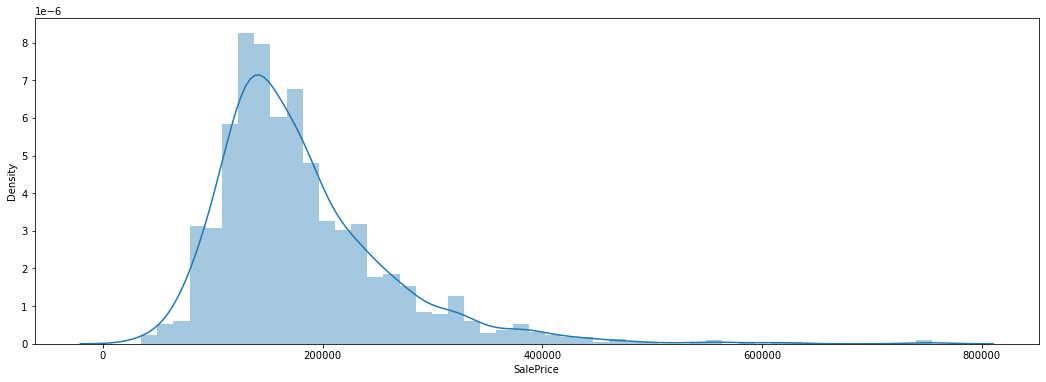

In [374]:
# Visualizing the distribution of saleprice (Dependent) variable
import seaborn as sns
sns.distplot(target, hist = True)

As we can see the distribution is left skewed, so in order to make it normally distributed, we need to use log transformation

In [375]:
# Log transformation (To make the data normal distributed)

target_log = np.log(target)

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

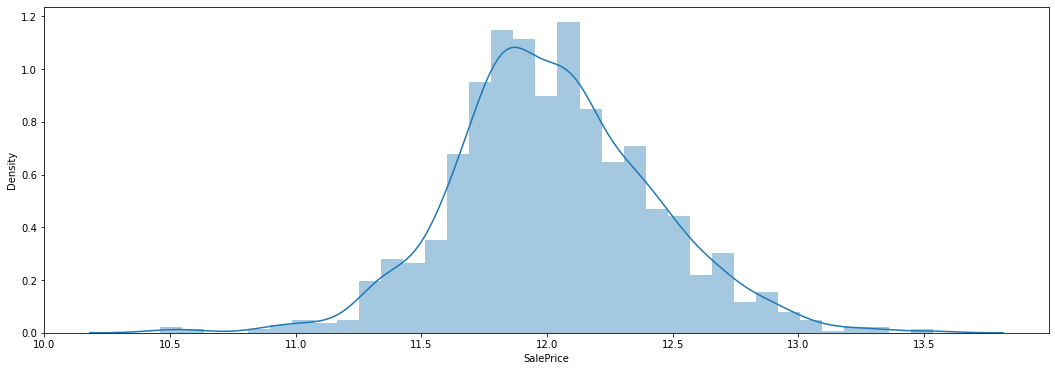

In [376]:
sns.distplot(target_log,hist = True)

array([[<AxesSubplot:title={'center':'Scale Price'}>,
        <AxesSubplot:title={'center':'Log Sale Price'}>]], dtype=object)

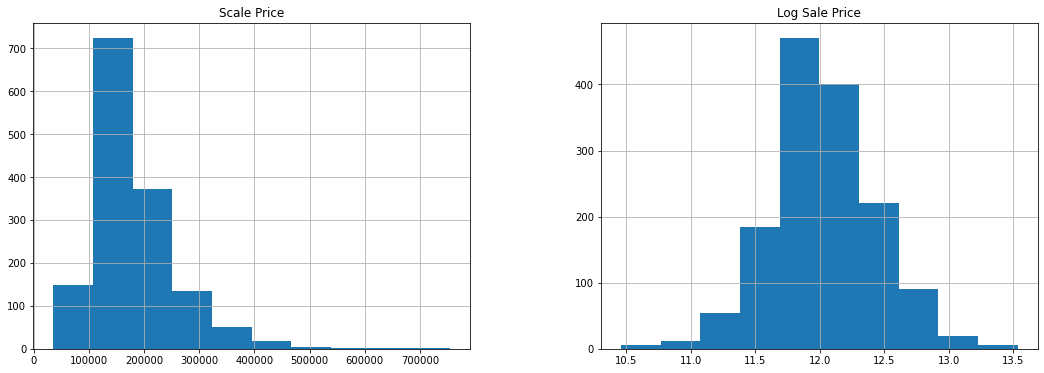

In [377]:
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (18.0,6.0)

# Matplotlib uses matplotlibrc configuration files to customize all kinds of properties, which we call 'rc settings' or 'rc parameters'.
#You can control the defaults of almost every property in Matplotlib:
# figure size and DPI, line width, color and style, axes, axis and grid properties, text and font properties and so on

prices = pd.DataFrame({'Scale Price': data1['SalePrice'],"Log Sale Price": target_log})

prices.hist()

After using the log Transformation, the Target variable is normally distributed

In [378]:
# Drop target variable from dataset
raw_data = data1
data1 = data1.drop(["SalePrice"],axis = 1)
# Axis = 1 indicates that you are dropping the column, axis = 0 indicates that you are dropping the row

#data1 = data1.drop(["SalePrice"],axis = 1, inplace = True)

data1.head()
# data = data1.drop("Ireland", axis = 0)
#delete all rows with label Ireland

# delete first five rows using iloc selector
# data = data.iloc[5:,]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# 3.3 Feature Engineering
## List of techniques
1. Imputation (fill Missing values)
2. Handling Ouliers
3. Binning
4. Log Transform (Skewed data is distributed with log transformation)
5. One Hot Encoding (Multiple values in table)
6. Grouping Operations
7. Feature Split (to split the feature eg. seperating name and last name)
8. Scaling
9. Extracting Date

In [379]:
data1.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,False,True,True,True,False,False,False,False,False


In [380]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [381]:
data1.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


In [382]:
# MSSubClass: Identifies the type of dwelling involved in the sale.

#MSSubClass = The building class
data1["MSSubClass"] = data1["MSSubClass"].apply(str)

# Changing OverallCond into categorical variable
data1['OverallCond'] = data1["OverallCond"].astype(str)

#Year and month sold are transformed into categorical features
data1['YrSold'] = data1['YrSold'].astype(str)
data1['MoSold'] = data1['MoSold'].astype(str)

In [383]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [384]:
# Adding Total sqfootage feature

# TotalBsmtSF: Total square feet of basement Area

# 1stFlrSF: First floor square feet

# 2ndFlrSF: Second floor square feet

data1['TotalSF'] = data1['TotalBsmtSF'] + data1['1stFlrSF'] + data1['2ndFlrSF']

# data1 = data1.drop(columns = ['TotalBsmtSF','1stFlrSF','2ndFlrSF','Id'])
# Removing TotalBsmtSF, 1stFlrSF ,2ndFlrSF and ID
data1 = data1.drop(['TotalBsmtSF'],axis = 1)
data1 = data1.drop(['1stFlrSF'],axis = 1)
data1 = data1.drop(['2ndFlrSF'],axis = 1)
data1 = data1.drop(['Id'],axis = 1)
data1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,TotalSF
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,2566
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,2524
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,2706
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,2473
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,3343


# For loop with if statement with assignment operator

In [385]:
# Save all categorical columns in list
categorical_columns =  [col for col in data1.columns.values if data1[col].dtype == 'object']

# Dataframe with categorical features
data_cat = data1[categorical_columns]

# Dataframe with numerical features 
data_num = data1.drop(categorical_columns,axis = 1)

In [386]:
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,5.844521,...,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,2567.048630
std,24.284752,9981.264932,1.382997,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,48.623081,...,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,821.714421
min,21.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000
25%,59.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,0.000000,...,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2009.500000
50%,69.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,0.000000,...,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2474.000000
75%,80.000000,11601.500000,7.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,0.000000,...,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3004.000000
max,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,572.000000,...,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,11752.000000


In [387]:
data_cat.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,TA,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,TA,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,TA,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,TA,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal


# 3.5 Reduce Skewness for Numerical Features

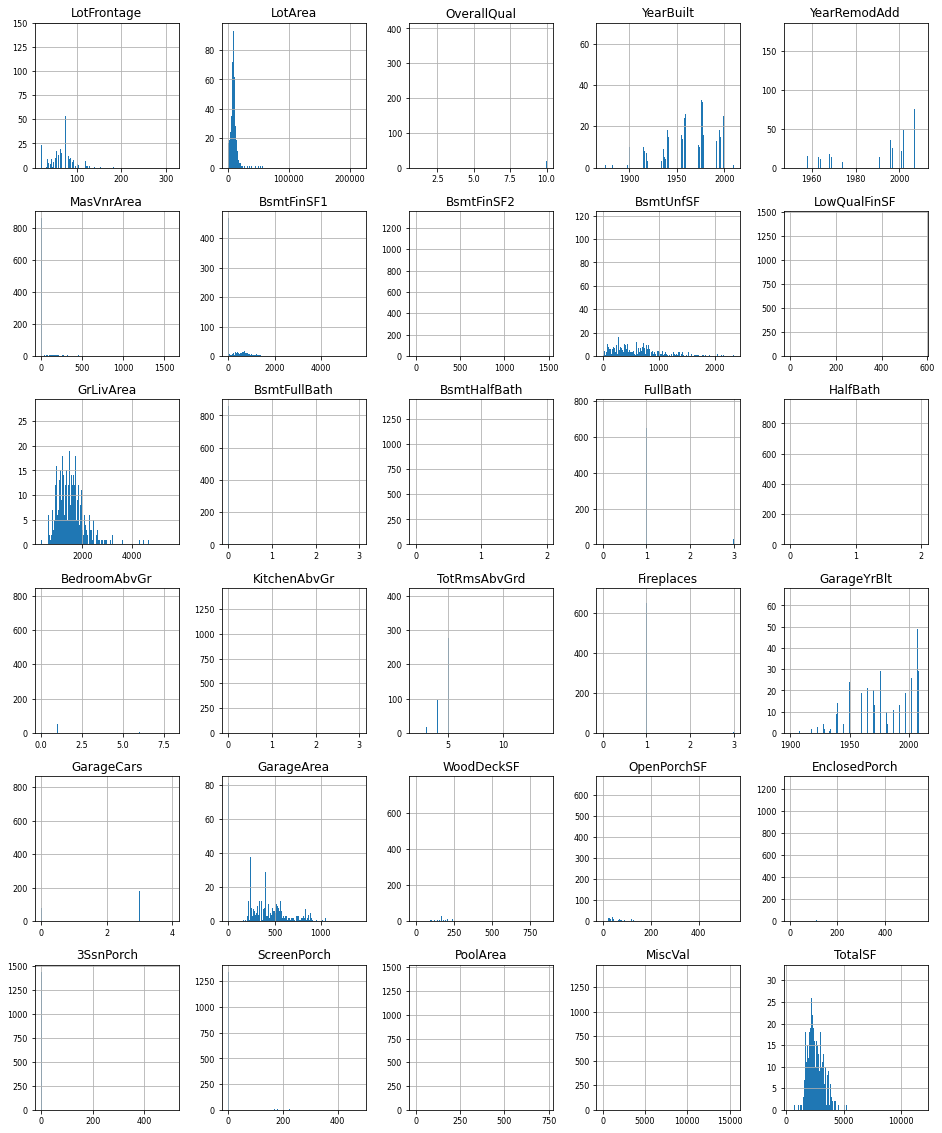

In [388]:
data_num.hist(figsize = (16,20),bins = 500, xlabelsize = 8, ylabelsize = 8);
# Avoid having the matplotlib verbose informations

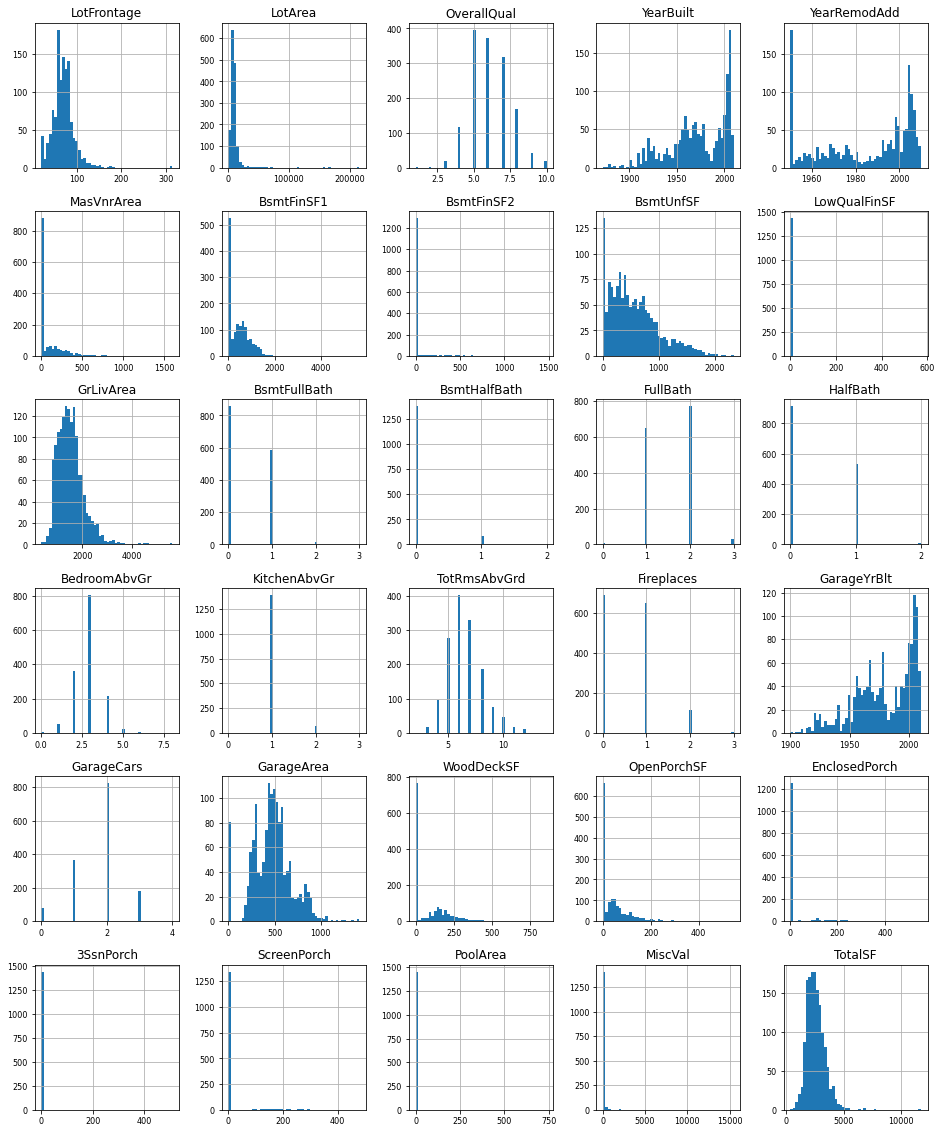

In [389]:
data_num.hist(figsize = (16,20),bins = 50, xlabelsize = 8, ylabelsize = 8);
# Avoid having the matplotlib verbose informations

If the skewness is less than -1 or greater than +1, the distribution is highly skewed.
If the skewness is between -1 and -1/2 or between +1/2 and 1, the distribution is moderately skewed.
If the skewness is between -1/2 and +1/2, the distribution is approximately symmetric.

In [390]:
from scipy.stats import skew
data_num_skew = data_num.apply(lambda x: skew(x.dropna()))
print(data_num_skew)
data_num_skew = data_num_skew[data_num_skew > 0.75]
print("\n","\n",data_num_skew)

# Apply log + 1 transformation for all numeric features with skewness over 0.75
data_num[data_num_skew.index] = np.log1p(data_num[data_num_skew.index])

LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
TotalSF           1.774874
dtype: float64

 
 LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
LowQualFi

In [391]:
data_num

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
0,4.189655,9.042040,7,2003,2003,5.283204,6.561031,0.000000,5.017280,0.0,...,2,548,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.000000,7.850493
1,4.394449,9.169623,6,1976,1976,0.000000,6.886532,0.000000,5.652489,0.0,...,2,460,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.000000,7.833996
2,4.234107,9.328212,7,2001,2002,5.093750,6.188264,0.000000,6.075346,0.0,...,2,608,0.000000,3.761200,0.000000,0.0,0.0,0.0,0.000000,7.903596
3,4.110874,9.164401,7,1915,1970,0.000000,5.379897,0.000000,6.293419,0.0,...,3,642,0.000000,3.583519,5.609472,0.0,0.0,0.0,0.000000,7.813592
4,4.442651,9.565284,8,2000,2000,5.860786,6.486161,0.000000,6.196444,0.0,...,3,836,5.262690,4.442651,0.000000,0.0,0.0,0.0,0.000000,8.114923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.143135,8.976894,6,1999,2000,0.000000,0.000000,0.000000,6.860664,0.0,...,2,460,0.000000,3.713572,0.000000,0.0,0.0,0.0,0.000000,7.863651
1456,4.454347,9.486152,6,1978,1988,4.787492,6.673298,5.099866,6.380123,0.0,...,2,500,5.857933,0.000000,0.000000,0.0,0.0,0.0,0.000000,8.193124
1457,4.204693,9.109746,7,1941,2006,0.000000,5.620401,0.000000,6.777647,0.0,...,1,252,0.000000,4.110874,0.000000,0.0,0.0,0.0,7.824446,8.158516
1458,4.234107,9.181735,5,1950,1996,0.000000,3.912023,6.937314,0.000000,0.0,...,1,240,5.905362,0.000000,4.727388,0.0,0.0,0.0,0.000000,7.676474


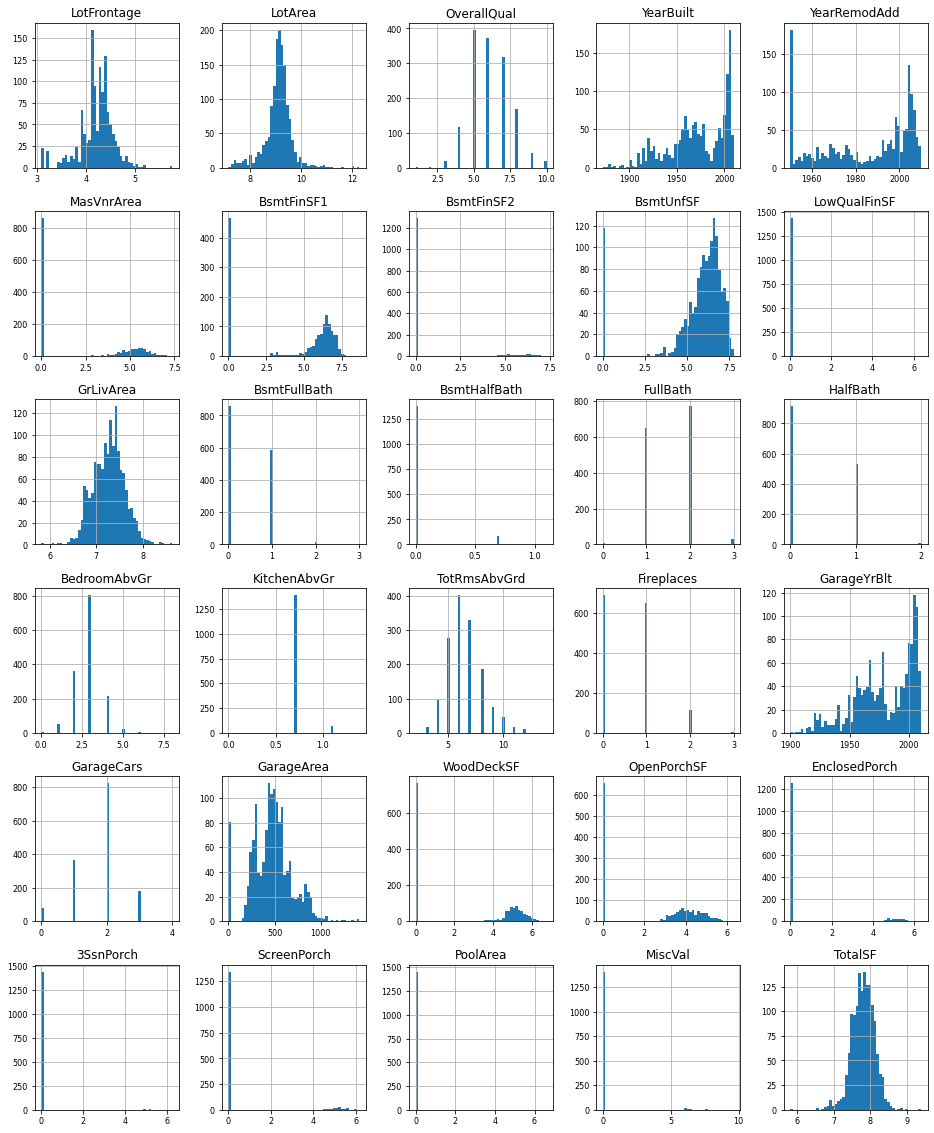

In [392]:
data_num.hist(figsize = (16,20),bins = 50, xlabelsize = 8, ylabelsize = 8);

# Mean Normalization


# Normalization usually means to scale a variable to have values between 0 and 1
Formula: x normalized = (x - x minimum)/(x maximum - x minimum)

# Mistake: It's data_num.min not data_num.mean()

In [393]:
data_num = ((data_num - data_num.min())/(data_num.max() - data_num.min()))


In [394]:
data_num.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,TotalSF
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,0.419834,0.379763,0.566591,0.719332,0.581096,0.288945,0.489636,0.089825,0.728201,0.015717,...,0.441781,0.333554,0.363782,0.366070,0.110527,0.013747,0.066496,0.004607,0.024196,0.558995
std,0.130242,0.101273,0.153666,0.218862,0.344090,0.356618,0.346361,0.252870,0.239024,0.117677,...,0.186829,0.150779,0.384395,0.341309,0.273511,0.107001,0.227206,0.066414,0.127067,0.088094
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.377415,0.344320,0.444444,0.594203,0.283333,0.000000,0.000000,0.000000,0.697681,0.000000,...,0.250000,0.235896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.503694
50%,0.435403,0.388752,0.555556,0.731884,0.733333,0.000000,0.689000,0.000000,0.795533,0.000000,...,0.500000,0.338505,0.000000,0.516644,0.000000,0.000000,0.000000,0.000000,0.000000,0.562118
75%,0.490307,0.428310,0.666667,0.927536,0.900000,0.693647,0.760527,0.000000,0.863236,0.000000,...,0.500000,0.406206,0.759467,0.671412,0.000000,0.000000,0.000000,0.000000,0.000000,0.616657
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>],
       [<AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>,
        <AxesSubplot:title={'center':'BsmtHalfBath'}>,
        <AxesSubplot:title={'center':'FullBath'}>,
        <AxesSubplot:title={'center':'HalfBath'}>],
       [<AxesSubplot:title={'center':'BedroomAbvGr'}>,
        <AxesSubplot:title={'center':'KitchenAbvGr'}>,
        <AxesSubplot:title={'center':'TotRmsAbvGrd'}>,
        <AxesSubplot:title={'center':

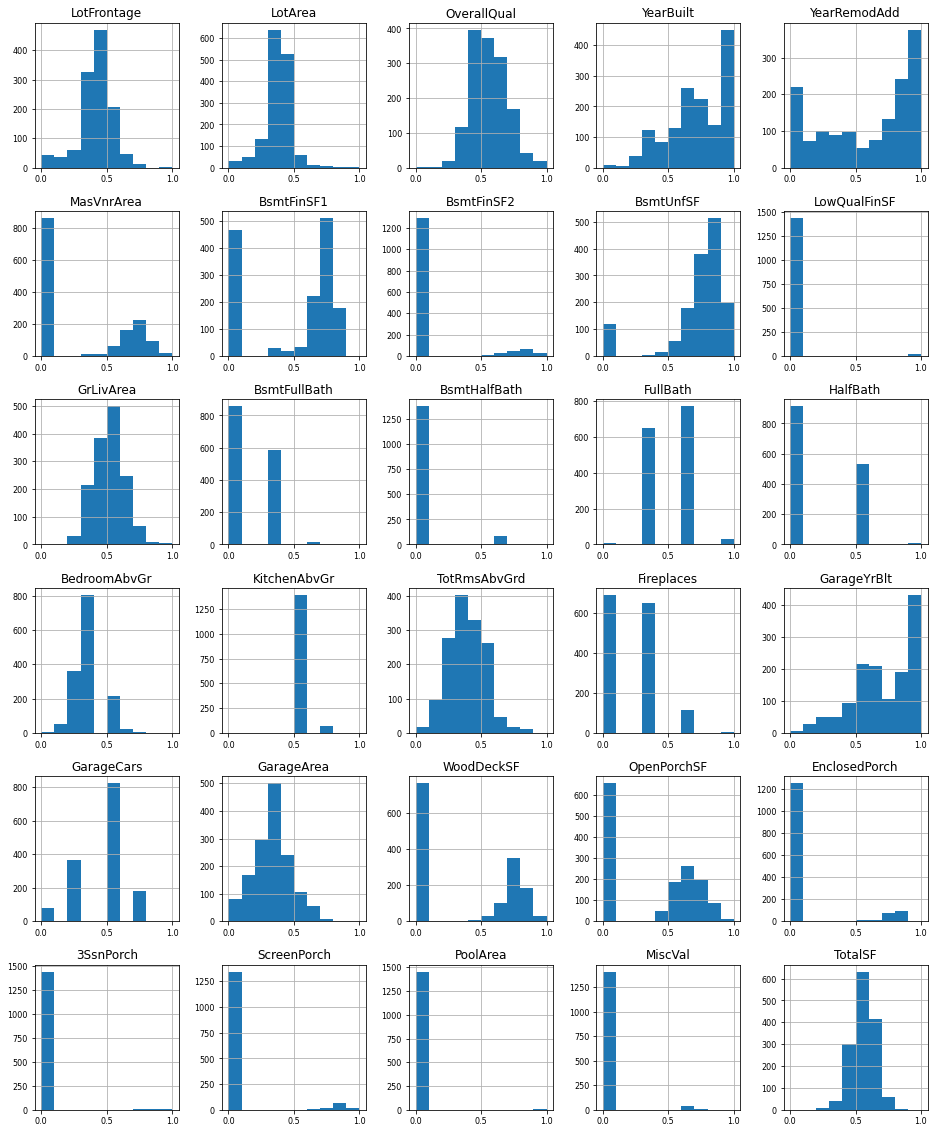

In [395]:
data_num.hist(figsize = (16,20), xlabelsize = 8, ylabelsize = 8)

After Mean Normalization the data scale will change and will not affect original data distribution

# 4. Missing Data Analysis

If the missing values are not handled properly we may end up drawing an inaccurate inference about data. Due to improper handling, the result obtained will differ from the Ones where the missing values are present

<AxesSubplot:>

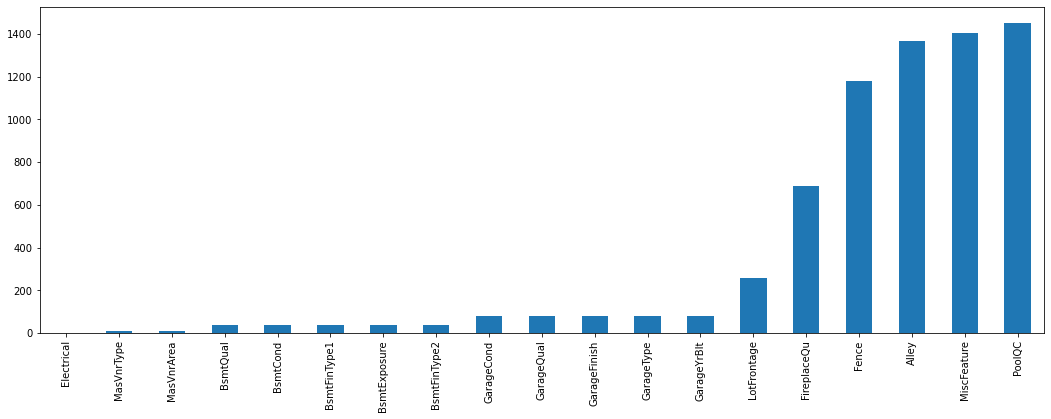

In [396]:
null_in_HousePrice = data1.isnull().sum()
null_in_HousePrice = null_in_HousePrice[null_in_HousePrice > 0]
null_in_HousePrice.sort_values(inplace = True)
null_in_HousePrice.plot.bar()

In [397]:
# Printing total numbers and percentage of missing data

total = data1.isnull().sum().sort_values(ascending = False)
percent = (data1.isnull().sum()/data1.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])

In [398]:
missing_data.head(15)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageCond,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


# 5.1 Handling Missing values in the numerical columns

In [399]:
# The shape attribute for numpy arrays returns the dimenstions of the array
# If y has n rows and m columns, then Y.shape is (n,m). So Y.shape[0] is n

data_len = data_num.shape[0]
print(data_len)


1460


In [400]:
for col in data_num.columns.values:
    missing_values = data_num[col].isnull().sum()
    
    # print("{} - missing: {} ({:0.2f}%)".format(col, missing_values,missing_values/data_len*100))
    # drop column if there is more than 50 missing values
    if missing_values > 260:
        data_num = data_num.drop(col,axis = 1)
    # if there is less than 260 missing values than fill in with median value of column
    else:
        data_num = data_num.fillna(data_num[col].median())

# Handling Missing values in Categorical columns
Here we do data imputation. If the number of missing values is more than 50, we drop the column from the analysis

In [401]:
# y.shape is (m,n)
data_len = data_cat.shape[0]
print(data_len)

1460


In [402]:
# Check the number of missing values in the dataframe
for col in data_cat.columns.values:
    missing_values = data_cat[col].isnull().sum()
    
    # drop the column if there are more than 50 missing values
    if missing_values > 50:
        print("Droping Column: {} ".format(col))
        data_cat.drop(col,axis = 1)
        
    else:
        # The pass statement in python is used when a statement is required syntatically but you do not want any command or code to be executed.
        pass

Droping Column: Alley 
Droping Column: FireplaceQu 
Droping Column: GarageType 
Droping Column: GarageFinish 
Droping Column: GarageQual 
Droping Column: GarageCond 
Droping Column: PoolQC 
Droping Column: Fence 
Droping Column: MiscFeature 


# Why did we select the number 50..........so large for numerical and so small for categorical values.

In [403]:
data_cat.describe()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1460,7,281,54,1460,1460,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,5,5,3,3,4,4,12,5,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,TA,TA,Y,Gd,MnPrv,Shed,6,2009,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,1311,1326,1340,3,157,49,253,338,1267,1198


# Dummy Coding

# For Example: 2 = 0010, 3 = 0011

In [404]:
# Dummy coding refers to the process of coding a categorical variable into dichotomous variables
data_cat.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallCond', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [405]:
# Using pandas.get_dummies function to convert categorical variable into dummy/indicator variable
data_cat_dummies = pd.get_dummies(data_cat,drop_first = True)

# Why is drop_first - True given here???????
it was 10*293 if not giving drop_first = true and otherwise it is 10*246

In [406]:
# Viewing the dimensionality of the dataframe
data_cat_dummies.head(10)

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [407]:
print("Numerical Features: " + str(len(data_num.columns)))
print("Categorical Features: " + str(len(data_cat_dummies.columns)))

Numerical Features: 30
Categorical Features: 246


In [408]:
# Using Concat function, we merge two dataframes for further analysis
newdata = pd.concat([data_num,data_cat_dummies],axis = 1)

# Expolatory data Analysis

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


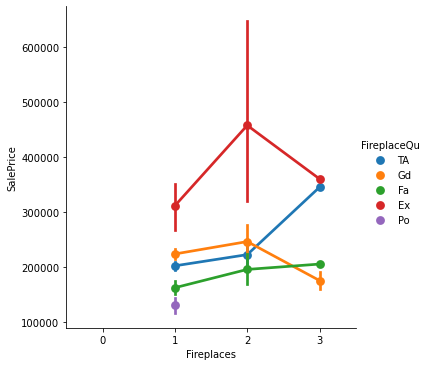

In [409]:
# Fireplaces: Number of fireplaces
# FireplaceQu: Fireplace quality

# Ex -> Excellent
# Gd -> Good - Masonry Fireplace in main level 
# TA -> Average - Prefabricated fireplace in main living area or Masonry fireplace in basement
# Fa -> Fair - Prefabricated fireplace in basement
# Po -> Poor - Ben Franklin Stove
# NA -> No fireplace

# A factor plot is simply the same plot generated for different response and factor variables and arranged on a single page.

sns.factorplot("Fireplaces","SalePrice",data = raw_data, hue = "FireplaceQu")

If there are two fireplaces, the Sales Price increases. Also, if there are fireplace of Excellent quality in the house the Sales Price increases.

In [410]:
# If fireplace is missing that means that doesn't have a FireplaceQu
FireplaceQu = raw_data['FireplaceQu'].fillna('None')
pd.crosstab(raw_data.Fireplaces, raw_data.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,Po,TA
Fireplaces,,,,,
1,19,28,324,20,259
2,4,4,54,0,53
3,1,1,2,0,1


C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

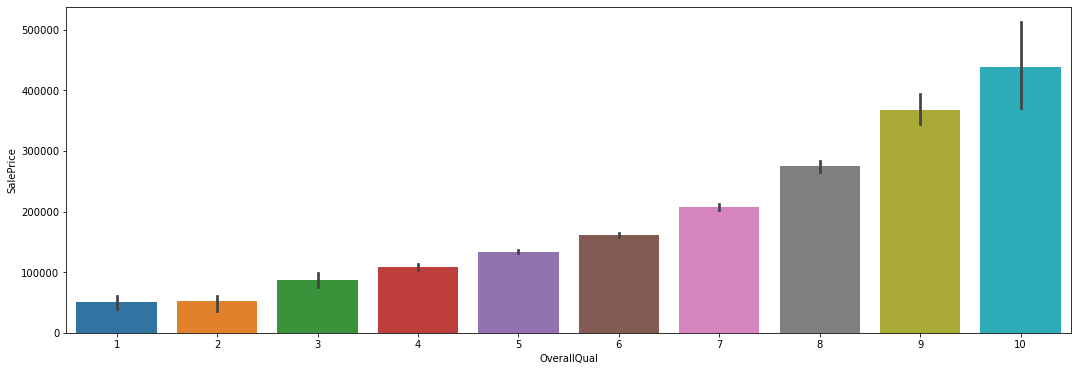

In [411]:
# OverallQual: Rates the overall material and finish of the house 
# 10 -> Very Excellent
# 9 -> Excellent
#8 -> Very Good
#7 -> Good 
#6 -> Above Average
#5 -> Average
#4 -> Below Average
#3 -> Fair
#2 -> Poor
#1 -> Very Poor

# Shows the relationship between a numerical variable and a categorical variable

sns.barplot(raw_data.OverallQual,raw_data.SalePrice)

As we can see, the sales price increases with the increase in overall Quality

[1151  218   65   16   10]


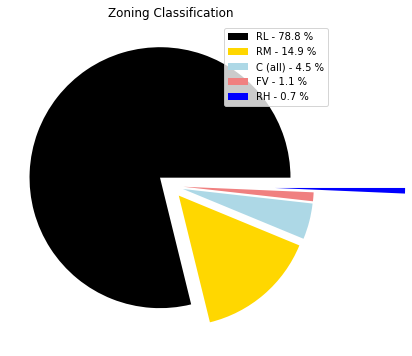

In [412]:
# If you have several values per group, showing only the average dissimulate the part of the information.
# In this case, consider doing a boxplot or a violinplot.
# Atleast you should show the number of observations per plot 

# MSZoning is a column in raw_data

labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values

print(sizes)

explode = [0.1,0.1,0.1,0.1,0.8]
# Explode is used in pie chart for making the wedges in piechart seperate from each other
percent = 100.*sizes/sizes.sum()

labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels,percent)]

colors = ['black','gold','lightblue','lightcoral','blue']
patches,texts = plt.pie(sizes,colors = colors,explode = explode,shadow = False, startangle = 0)

# wedgeprops = {'linewidth':3, 'edgecolor':'orange'}
plt.legend(patches,labels,loc = 'best')
plt.title('Zoning Classification')
plt.show()

[1151  218   65   16   10]


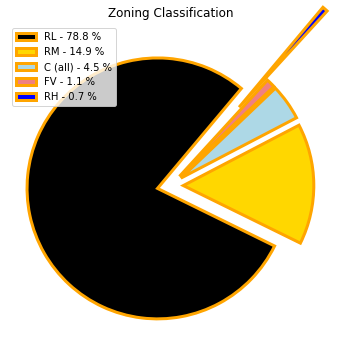

In [413]:
# If you have several values per group, showing only the average dissimulate the part of the information.
# In this case, consider doing a boxplot or a violinplot.
# Atleast you should show the number of observations per plot 

# MSZoning is a column in raw_data

labels = raw_data["MSZoning"].unique()
sizes = raw_data["MSZoning"].value_counts().values

print(sizes)

explode = [0.1,0.1,0.1,0.1,0.8]
# Explode is used in pie chart for making the wedges in piechart seperate from each other
percent = 100.*sizes/sizes.sum()

labels = ['{0} - {1:1.1f} %'.format(i,j) for i,j in zip(labels,percent)]

colors = ['black','gold','lightblue','lightcoral','blue']
patches,texts = plt.pie(sizes,colors = colors,explode = explode,shadow = False, startangle = 50, 
                        wedgeprops = {'linewidth':3, 'edgecolor':'orange'})

# wedgeprops = {'linewidth':3, 'edgecolor':'orange'}
plt.legend(patches,labels,loc = 'best')
plt.title('Zoning Classification')
plt.show()

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sale Price')

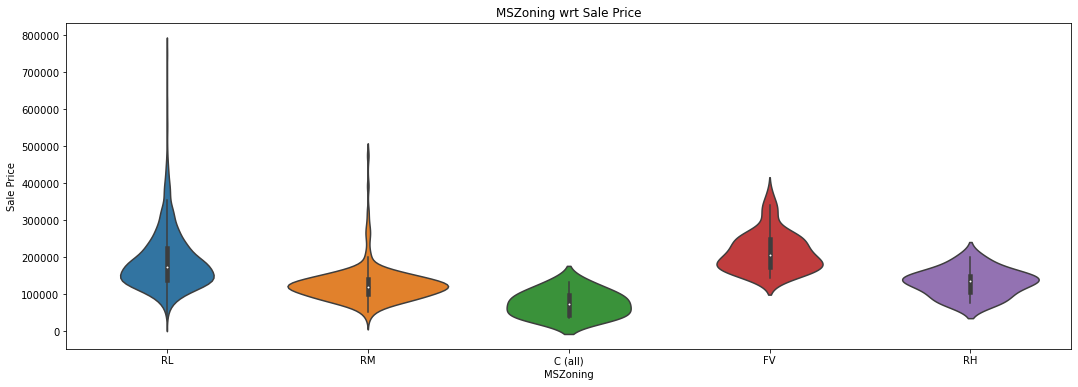

In [414]:
# Violin Plot combines two aspects of a distribution in a single visualization. 
#The features of a box plot and the probability density funciton

sns.violinplot(raw_data.MSZoning,raw_data['SalePrice'])
plt.title('MSZoning wrt Sale Price')
plt.xlabel('MSZoning')
plt.ylabel('Sale Price')

Text(0.5, 0, 'Price per square feet')

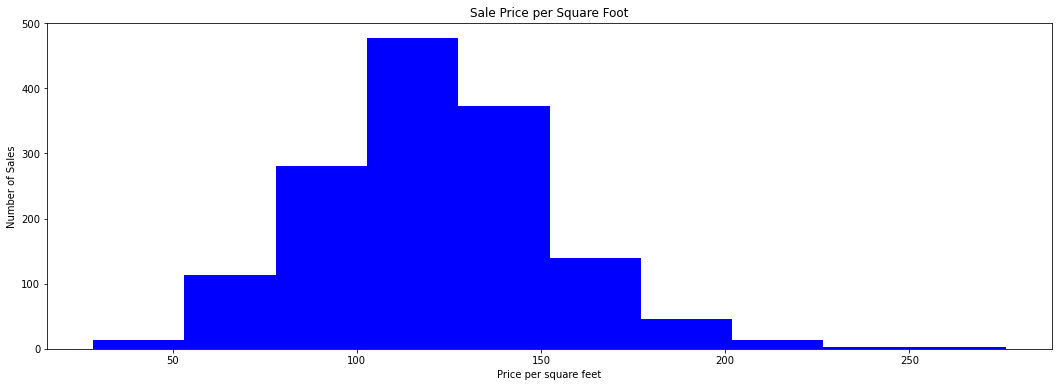

In [415]:
# GrivArea: Above grade (ground) living area square feet 
# SalePriceSF = Sale price Square feet

SalePriceSF = raw_data['SalePrice']/raw_data['GrLivArea']
plt.hist(SalePriceSF,color = "blue")
plt.title("Sale Price per Square Foot")
plt.ylabel('Number of Sales')
plt.xlabel('Price per square feet')

Most of the sales happend in 100 and 150 square feet

Text(0.5, 0, 'Construction age of house')

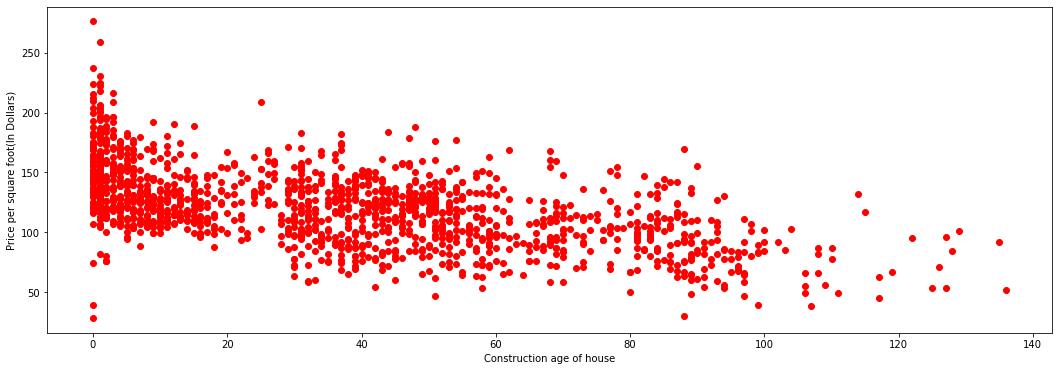

In [416]:
ConstructionAge = raw_data['YrSold'] - raw_data['YearBuilt']
plt.scatter(ConstructionAge,SalePriceSF,color = 'red')
plt.ylabel('Price per square foot(In Dollars)')
plt.xlabel('Construction age of house')

In [417]:
# Strip Plot is the scatter plot where one of the variable is categorical.
# It plots the distribution of variable for each category as individual end points.
# For vertical strip plots distribution of continuous values are led out parallel with the y axis and the distinct categories are spaced out along the x axis


For the above representation, price of house goes down with its age

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


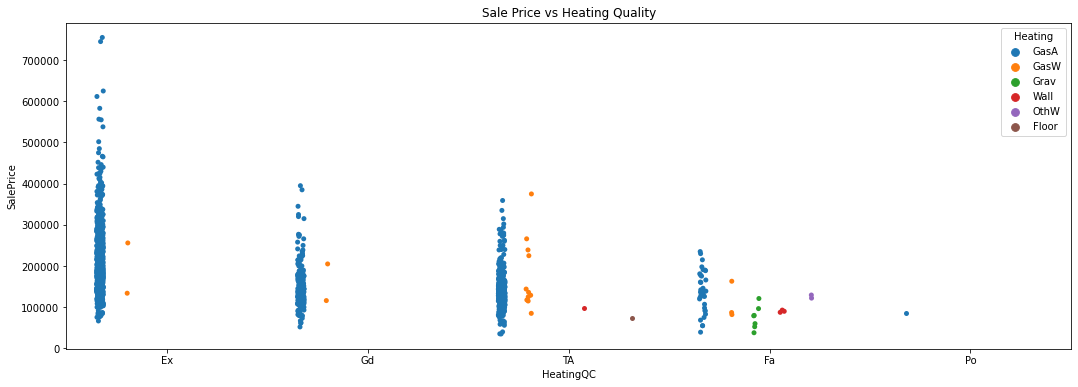

In [418]:
# Heating: Type of heating 
# Floor -> Floor furnance
# GasA -> Gas forced warm air furnance
# GasW -> Gas hot water or steam heat
# Grav -> Gravity furnance
# OthW -> Hot water or steam heat other than gas
#  Wall -> Wall furnance

# HeatingQC: Heat quality and condition
# Ex -> Excellent
# Gd -> Good 
# TA -> Average
# Fa -> Fair
# Po -> Poor

# CentralAir: Central air conditioning
# N -> No
# Y -> Yes

# Heating and AC arrangements

sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'Heating',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


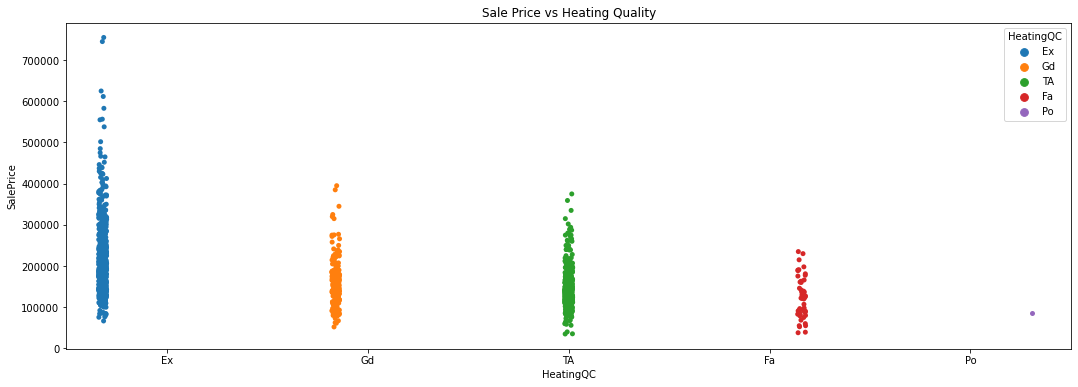

In [419]:
sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'HeatingQC',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:2792: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


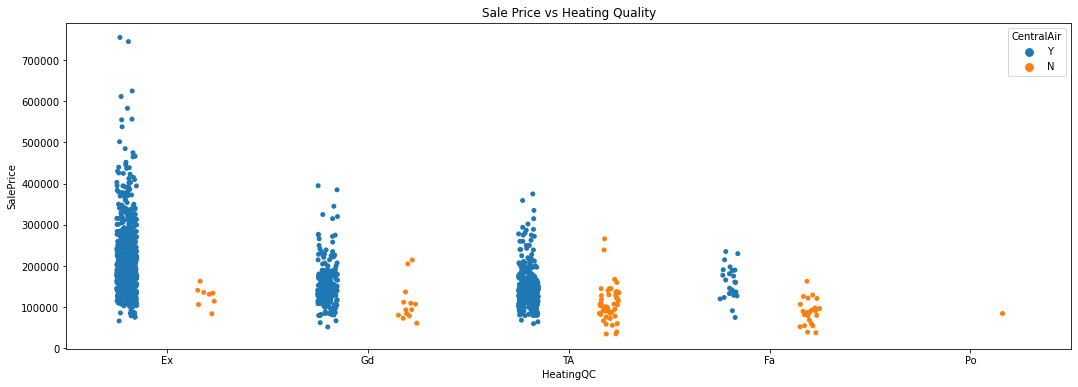

In [420]:
sns.stripplot(x = 'HeatingQC',y = 'SalePrice',data = raw_data,hue = 'CentralAir',jitter = True,split = True)
plt.title('Sale Price vs Heating Quality');

Having AC definitely escalates price of house

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sale Price vs Full Bathrooms')

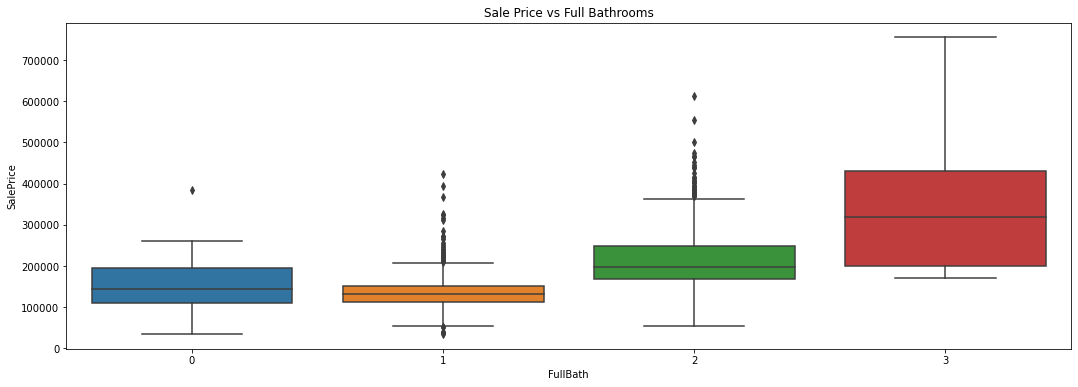

In [421]:
# FullBath: Full Bathrooms above grade
sns.boxplot(raw_data['FullBath'],raw_data['SalePrice'])
plt.title('Sale Price vs Full Bathrooms')

C:\Users\sony\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Sale Price vs Kitchen')

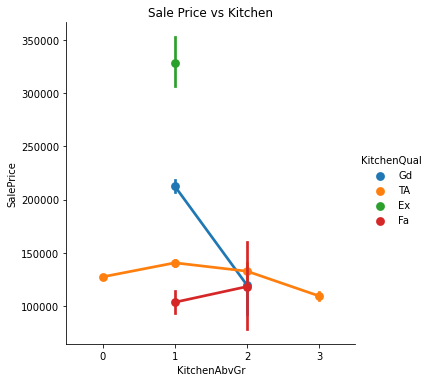

In [422]:
# KitchenQual: Kitchen quality
# Ex -> Excellent
# Gd -> Good 
# TA -> Typical/Average
# Fa -> Fair
# Po -> Poor

# Kitchen Quality
sns.factorplot('KitchenAbvGr','SalePrice',data = raw_data,hue = 'KitchenQual')
plt.title("Sale Price vs Kitchen")

# 7.2 Correlation Plot

TypeError: cannot convert dictionary update sequence element #0 to a sequence

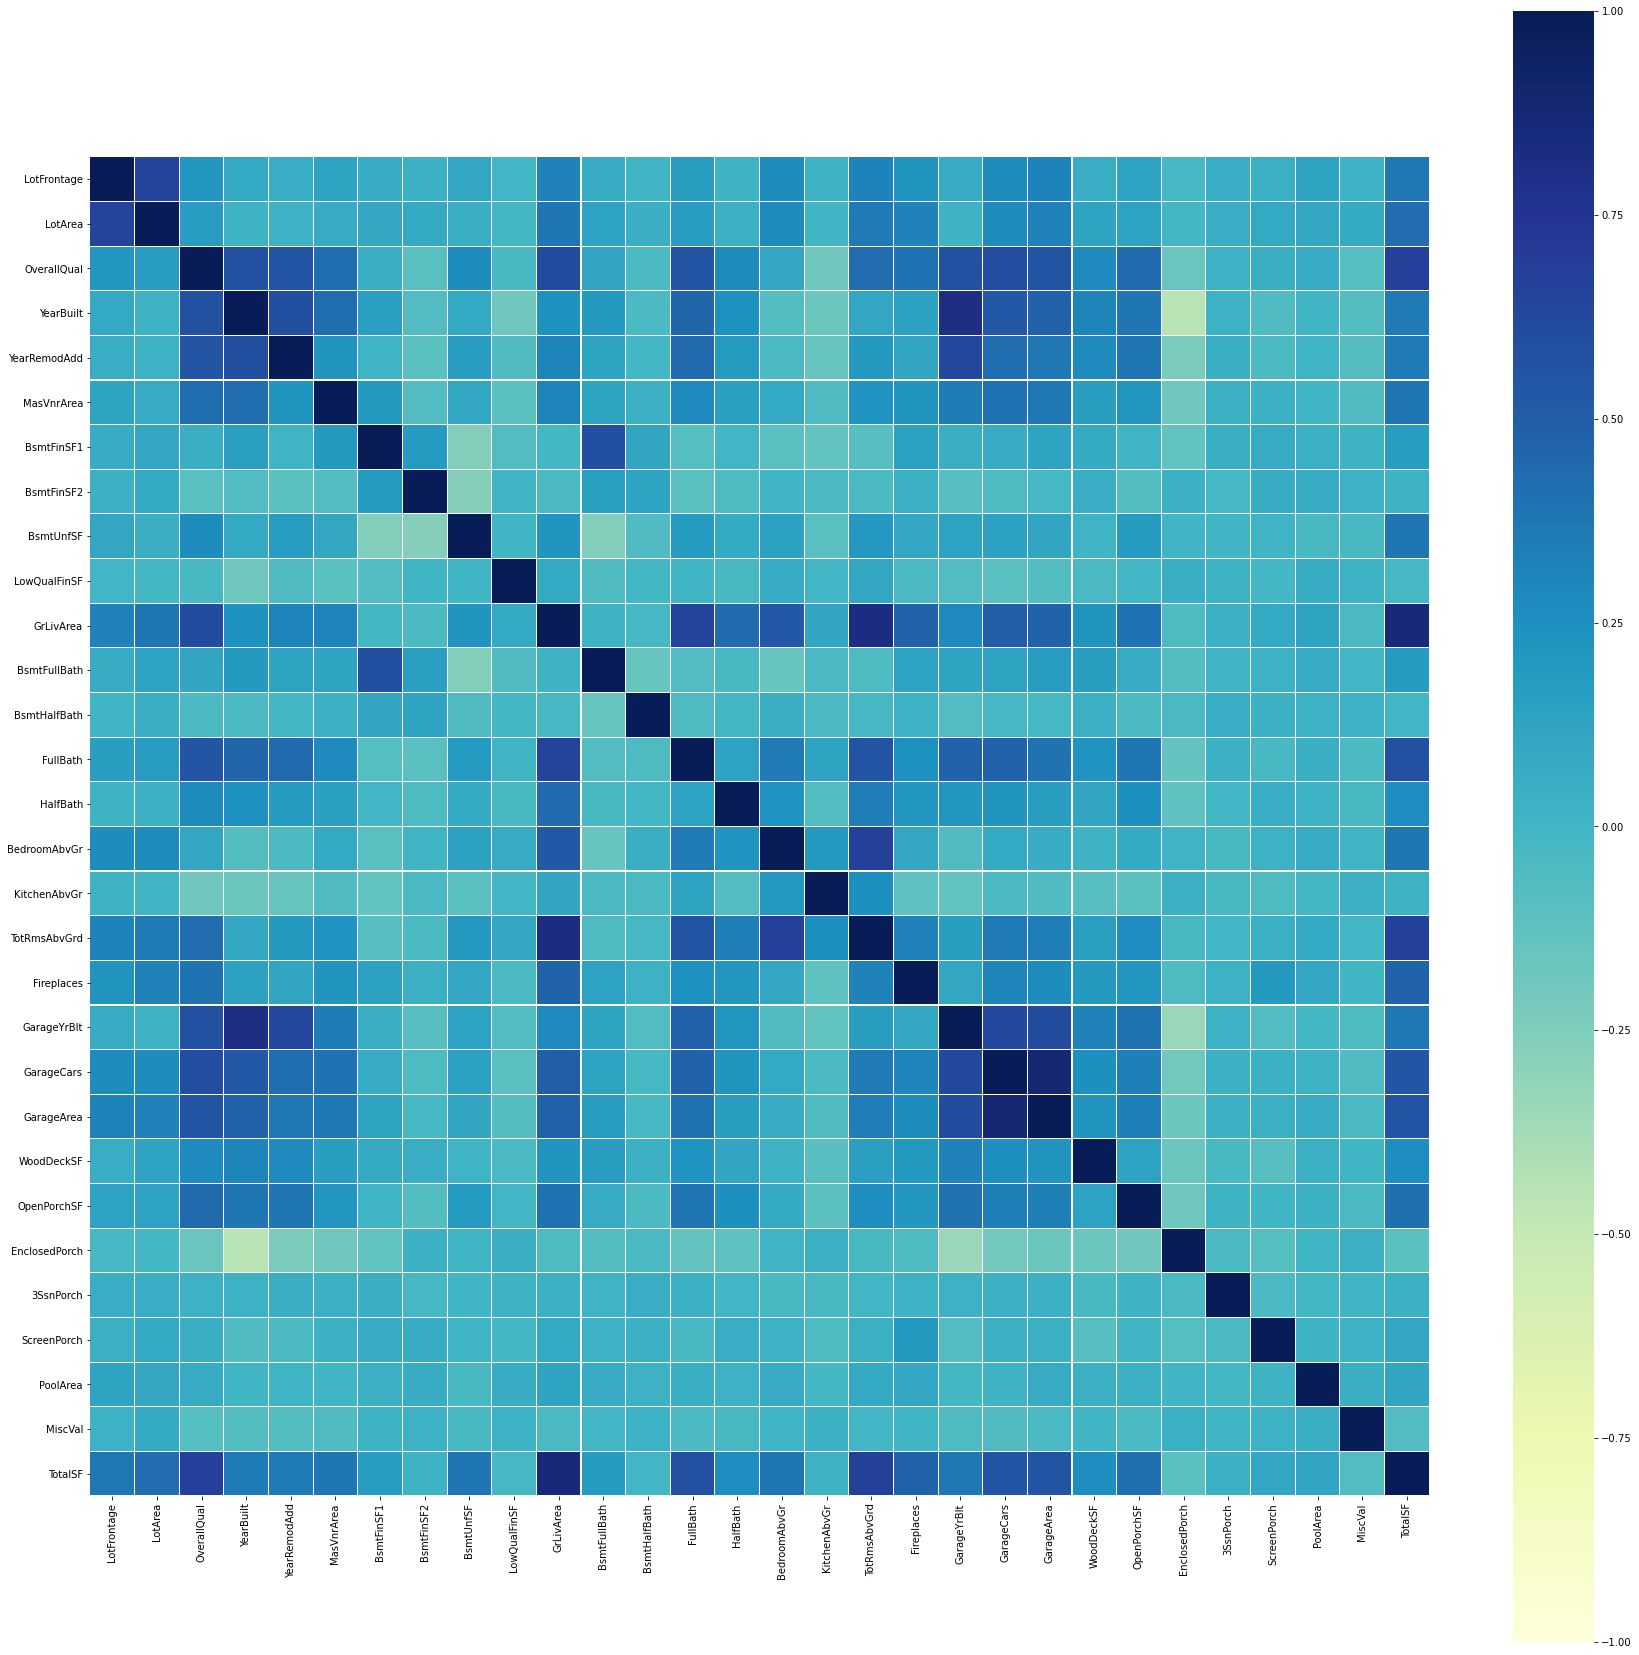

In [423]:
# Plotting correlation plot
import matplotlib.pyplot as plt
# method: pearson: standard correlation coefficient, kendall: Kendall Tau correlation coefficient, spearman: Spearman rank correlation 
corr = data_num.corr()
plt.figure(figsize = (30,30))

# seaborn.heatmap(data, vmin = None, vmax = None, cmap = None, center = None, robust = False, annot = None, fmt = '.2g', annot_kws = None, linewidths = 0, linecorlor = 'white', cbar = True, cbar_kws = None, char_ax = None, square = False, xticklabels ='auto', yticklabels = 'auto', mask = None, ax = None, **kwargs)
# [(corr >= 0.7) | (corr <= -0.7)]

# cmap: Color of the map
# annot = True: Write the data values in each column
# Linewidth: Width of the line that will divide each cell
# vmax and vmin: Values to anchor the colormap
sns.heatmap(corr,
            cmap = 'YlGnBu', vmax = 1.0,
            vmin = -1.0, linewidth = 0.1,annot = True,
             annot_kws = {"size", 20}, square = True);
plt.title("Correlation between features")

In [ ]:
# 0.0 - 0.2 -> Weak Correlation
# 0.3 - 0.6 -> Moderate Correlation
# 0.7 - 1.0 -> Strong Correlation

# +1 Perfect positive
# -1 Perfect negative

In [ ]:
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)],
            cmap = 'YlGnBu', vmax = 1.0,
            vmin = -1.0, linewidth = 0.1
            ,annot = True,
             annot_kws = {"size", 15}, square = True);
plt.title("Correlation between features")

As we can see the above are the few features which show high multicollinearity from heatmap. DarkBlue squares on diagonal line has mulitcollinearity.

# 8. Linear Regression Modelling
# 8.1 Prepration of Datasets

In [ ]:
# Let us now split the data into train and test 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(newdata, target_log, test_size = 0.30, random_state = 0)
print("x_train",x_train.shape)
print("x_test",x_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

# 8.2 Building a linear Regression Based Model

In [ ]:
# Lets build a Linear Regression model using stats model
import statsmodels.api as sm

# Building Linear Regression model as OLS
model1 = sm.OLS(y_train, x_train).fit()
# Note the swap of X and Y

In [ ]:
model1.summary()

In [ ]:
# rmse: Root mean squared error

def rmse(predictions, targets):
    differences = predictions - targets
    differences_squared = differences ** 2
    mean_of_differences_squared = differences_squared.mean()
    rmse_val = np.sqrt(mean_of_differences_squared)
    return rmse_val

In [ ]:
cols = ['Model' , 'R - squared Error', 'Adj.R-Squared','RMSE']
models_report =  pd.DataFrame(columns = cols)
predictions1 = model1.predict(x_train)

# ?????

In [ ]:
tmp1 = pd.Series({'Model':"Base Linear Regression Model",
                 "R-Squared Value": model1.rsquared,
                 'Adj.R-Squared Value': model1.rsquared_adj,
                  'RMSE':rmse(predictions1,y_test)})
model1_report = models_report.append(tmp1,ignore_index = True)
print(model1_report)

# 8.3 Building model with Constant

In [ ]:
# result = model.fit(x,y)
df_constant = sm.add_constant(newdata)

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(df_constant, target_log, test_size = 0.30, random_state = 0)

In [ ]:
# Lets build Linear regression model using statmodel
model2 = sm.OLS(y_train1, x_train1).fit()

# Note the swap of X and Y

In [ ]:
model2.summary2()

In [ ]:
# Predicting the model on test data
predictions2 = model2.predict(x_test1)
tmp2 = pd.Series({'Model': "Linear Regression Model with Constant",
                 'R-Squared Value': model2.rsquared,
                 'Adj.R-Squared Value': model2.rsquared_adj,
                 'RMSE':rmse(predictions2, y_test1)})
model2_report = models_report.append(tmp2, ignore_index = True)
print(model2_report)

# Multicollinearity

$$ VIF = 1/(1-R^2) $$

A rule of thumb for interpreting the variance inflation factor:

1. 1 = Not correlated
2. Between 1 and 5 = moderately correlated
3. Greater than 5 = highly correlated


# 8.4 Calculating Variance Inflation Factor(VIF)

In [ ]:
print(" \n Variance Inflation Factor")
cnames = x_train1.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train1[yvar], x_train1[xvars])
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))

Removing variable that has threshold value of VIF above 100



**Removing variable having threshold value above 100**

In [ ]:
vif_100 = ['MSSubClass_20','MSSubClass_60','RoofStyle_Gable','RoofStyle_Hip', 'Exterior1st_MetalSd', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'GarageQual_TA', 'GarageCond_TA']

# Custom function to remove variables having higer VIF
to_keep = [x for x in x_train1 if x not in vif_100]

# print(to_keep)
x_train2 = x_train1[to_keep]
print(x_train2.head())

# 8.4.1 Building the Model after removing VIF above 100

In [ ]:
# Lets build Linear Regression Model using stats model

# Building Linear Regression model using OLS
model3 = sm.OLS(y_train1,x_train2).fit()

# Note the swap of X and Y
# Printing the Linear Regression Summary
model3.summary()

In [ ]:
# Removing the columns with VIF greater than 100 from test data also.
to_keep = [x for x in x_test if x not in vif_100]
x_test2 = x_test1[to_keep]
x_test2.head()

In [ ]:
predictions3 = model3.predict(x_test2)

tmp3 = pd.Series({'Model': 'LRM after removing VIF above 100',
                 'R-Squared Value': model3.rsquared,
                 'Adj-R-Squared': model3.rsquared_adj,
                 'RMSE': rmse(predictions3, y_test1)})

model3_report = models_report.append(tmp3, ignore_index = True)
model3_report

#### Checking variable having VIF above 10

In [ ]:
# Removing variable has threshold value of VIF above 10
print('\n Variance Inflation Factor')
cnames = x_train2.columns

for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar], (x_train2[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar, round(vif,3))

# Below are the variable having above 10 VIF Threshold

In [ ]:
VIF_10 = ['YearBuilt','MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', 'MiscVal', 'TotalSF', 'MSSubClass_190',
          'MSSubClass_45','MSSubClass_50', 'MSSubClass_80', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide',
         'Neighborhood_CollgCr','Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_NAmes',
         'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_Somerst', 'Condition2_Feedr', 'Condition2_Norm',
         'BldgType_2fmCon','HouseStyle_1.5Unf', 'HouseStyle_1Story','HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
         'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng','Exterior2nd_CmentBd', 
         'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None',
          'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_TA', 'Foundation_PConc', 'BsmtQual_TA',
         'BsmtFinType1_Unf', 'BsmtFinType2_Unf','Heating_GasA','Heating_GasW', 'Heating_GasW', 'Heating_Gasv', 'KitchenQual_TA',
         'Functional_Typ', 'GarageType_Attchd', 'GarageType_Detchd', 'MiscFeature_Shed', 'SaleType_New','SaleCondition_Partial']

to_keep = [x for x in x_train2 if x not in VIF_10]
# print(to_keep)
x_train2 = x_train2[to_keep]
x_train2.head()


# 8.4.2 Building model after removing VIF above 10

In [ ]:
# Lets build Linear Regression model using statsmodel
# Building Linear Regression model using OLS

model4 = sm.OLS(y_train1, x_train2).fit()
# Note the Svap of X and Y
# Printing Linear Regression Summary

model4.summary()

In [ ]:
to_keep = [x for x in x_test2 if x not in VIF_10]
# print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()


In [ ]:
predictions4 = model4.predict(x_test2)
tmp4 = pd.Series({'Model': 'LRM after removing VIF above 10',
                 'R-Squared Value': model4.rsquared,
                 'Adj.R-Squared Value': model4.rsquared_adj,
                 'RMSE': rmse(predictions4,y_test1)})

model4_report = models_report.append(tmp4, ignore_index = True)
model4_report.head()

# Checking variable having VIF above 5

In [ ]:
# Removing variable has threshold value of VIF above 5
print(" \n Variance Inflation Factor")

cnames = x_train2.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(x_train2[yvar], x_train2[xvars])
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print(yvar,round(vif,3))


# Below are the variable having above 5 VIF threshold

In [ ]:
VIF_5 = ['LotArea', 'Fireplaces', 'GarageYrBlt','GarageCars','GarageArea','PoolArea', 'MSSubClass_75','Condition1_Norm',
        'RoofStyle_Shed', 'PoolQC_Gd', 'MoSold_6', 'MoSold_7']

to_keep = [x for x in x_train2 if x not in VIF_5]
# print(to keep)

x_train2 = x_train2[to_keep]
x_train2.head()

## 8.4.3 Building Model after removing VIF above 5

In [ ]:
# Lets build Linear Regression model using statsmodel
# Build Linear Regression model using OLS

model5 = sm.OLS(y_train1,x_train2).fit()

# Note the swap of X and Y
# Printing Linear Regression Summary

model5.summary()

In [ ]:
to_keep = [x for x in x_test2 if x not in VIF_5]
# print(to_keep)
x_test2 = x_test2[to_keep]
x_test2.head()


In [ ]:
predictions5 = model5.predict(x_test2)
tmp5 = pd.Series({'Model': 'LRM after removing VIF above 5',
                 'R-Squared Value': model5.rsquared,
                 'Adj.R-Squared Value': model5.rsquared_adj,
                 'RMSE': rmse(predictions5,y_test1)})

model5_report = models_report.append(tmp5, ignore_index = True)
model5_report